# Импорт библиотек

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from matplotlib import pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Загрузка данных

In [3]:
data = pd.read_csv('data/train_data.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


# Подготовка данных
###### Наиболее важными процедурами в очистке данных являются заполнение пустот и кодирование категориальных признаков, т.к. большинство алгоритмов машинного обученияумеют работать только с данными типа float и не умеют обрабатывать пустые значения

In [5]:
data.count() # команда выводит количество не пустых полей для каждого признака в наборе данных

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
data.Age = data.Age.fillna(data.Age.mean()) # заменяем пустые значения на среднее значение по признаку
data.Ticket = data.Ticket.fillna("_MISSING_") # заменяем пустые значения на _MISSING_ 
data.Fare = data.Fare.fillna(-999)
data.Embarked = data.Embarked.fillna("_MISSING_")
data = data.drop(["Cabin"], axis=1)

In [7]:
for column in ["Name", "Sex", "Ticket", "Embarked"]:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column]) # производим кодирование категориальных признаков

# Разбиение датасета на входные данные и целевой признак
###### Признаки в датасете необходимо разбить на X и Y, где X - данные по которым будет предсказываться целевой признак Y

In [8]:
X = data.drop(["Survived"], axis=1)
y = data.Survived

In [9]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,108,1,22.00,1,0,523,7.25,2
1,2,1,190,0,38.00,1,0,596,71.28,0
2,3,3,353,0,26.00,0,0,669,7.92,2
3,4,1,272,0,35.00,1,0,49,53.10,2
4,5,3,15,1,35.00,0,0,472,8.05,2


In [10]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Разбиение выборки на тренировочную и валидационную
###### Для оценки адекватности обученных моделей дата-аналитики оценивают свою работу на валидационном наборе данных, где валидационный набор данных - часть тренировочного датасета.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

# Обучение моделей

In [12]:
log_reg = LogisticRegression() # инициализируем модели
naive_bayes = GaussianNB()
knn = KNeighborsClassifier()
svm = LinearSVC()
decision_tree = DecisionTreeClassifier()

In [13]:
for model in [log_reg, naive_bayes, knn, svm, decision_tree]:
    model.fit(X_train, y_train) # обучаем каждую модель из списка на тренировочном наборе данных

# Классификация с помощью обученных моделей и оценка результата

In [14]:
for model, model_name in [(log_reg, "logistic_regression"), (naive_bayes, "naive_bayes"),
                          (knn, "k_nearest_neighbors"), (svm, "svm"), (decision_tree, "decision_tree")]:
    
    prediction = model.predict(X_test) # предсказываем результат для валидационного набора данных
    print(f"{model_name} accuracy_score = {accuracy_score(prediction, y_test)}") # рассчитываем значение метрик
    print(f"{model_name} precision_score = {precision_score(prediction, y_test)}")
    print(f"{model_name} f1_score = {f1_score(prediction, y_test)}\n")

logistic_regression accuracy_score = 0.7757847533632287
logistic_regression precision_score = 0.6741573033707865
logistic_regression f1_score = 0.7058823529411764

naive_bayes accuracy_score = 0.7892376681614349
naive_bayes precision_score = 0.7752808988764045
naive_bayes f1_score = 0.745945945945946

k_nearest_neighbors accuracy_score = 0.6547085201793722
k_nearest_neighbors precision_score = 0.43820224719101125
k_nearest_neighbors f1_score = 0.503225806451613

svm accuracy_score = 0.7085201793721974
svm precision_score = 0.3146067415730337
svm f1_score = 0.46280991735537197

decision_tree accuracy_score = 0.7757847533632287
decision_tree precision_score = 0.7528089887640449
decision_tree f1_score = 0.7282608695652174



# Вывод значимости признаков для моделей

###### Как видно из нижеприведенных таблиц, одними из наиболее значимых признаков для моделей являются пол и класс билета. Это схоже с реальностью, так как при крушении титаника в первую очередь спасали женщин и пассажиров первого класса, где ехали пассажиры с наиболее дорогими билетами

In [15]:
log_reg_weights = pd.DataFrame(columns=["column", "weight"], data=[(X_train.columns[idx], abs(log_reg.coef_[0][idx])) for idx, element in enumerate(X_train.columns)])
log_reg_weights

,column,weight
0,PassengerId,0.00
1,Pclass,0.18
2,Name,0.00
3,Sex,2.15
4,Age,0.00
5,SibSp,0.34
6,Parch,0.26
7,Ticket,0.00
8,Fare,0.01
9,Embarked,0.06


In [16]:
svm_weights = pd.DataFrame(columns=["column", "weight"], data=[(X_train.columns[idx], abs(svm.coef_[0][idx])) for idx, element in enumerate(X_train.columns)])
svm_weights

,column,weight
0,PassengerId,0.00
1,Pclass,0.05
2,Name,0.00
3,Sex,0.30
4,Age,0.00
5,SibSp,0.02
6,Parch,0.01
7,Ticket,0.00
8,Fare,0.00
9,Embarked,0.01


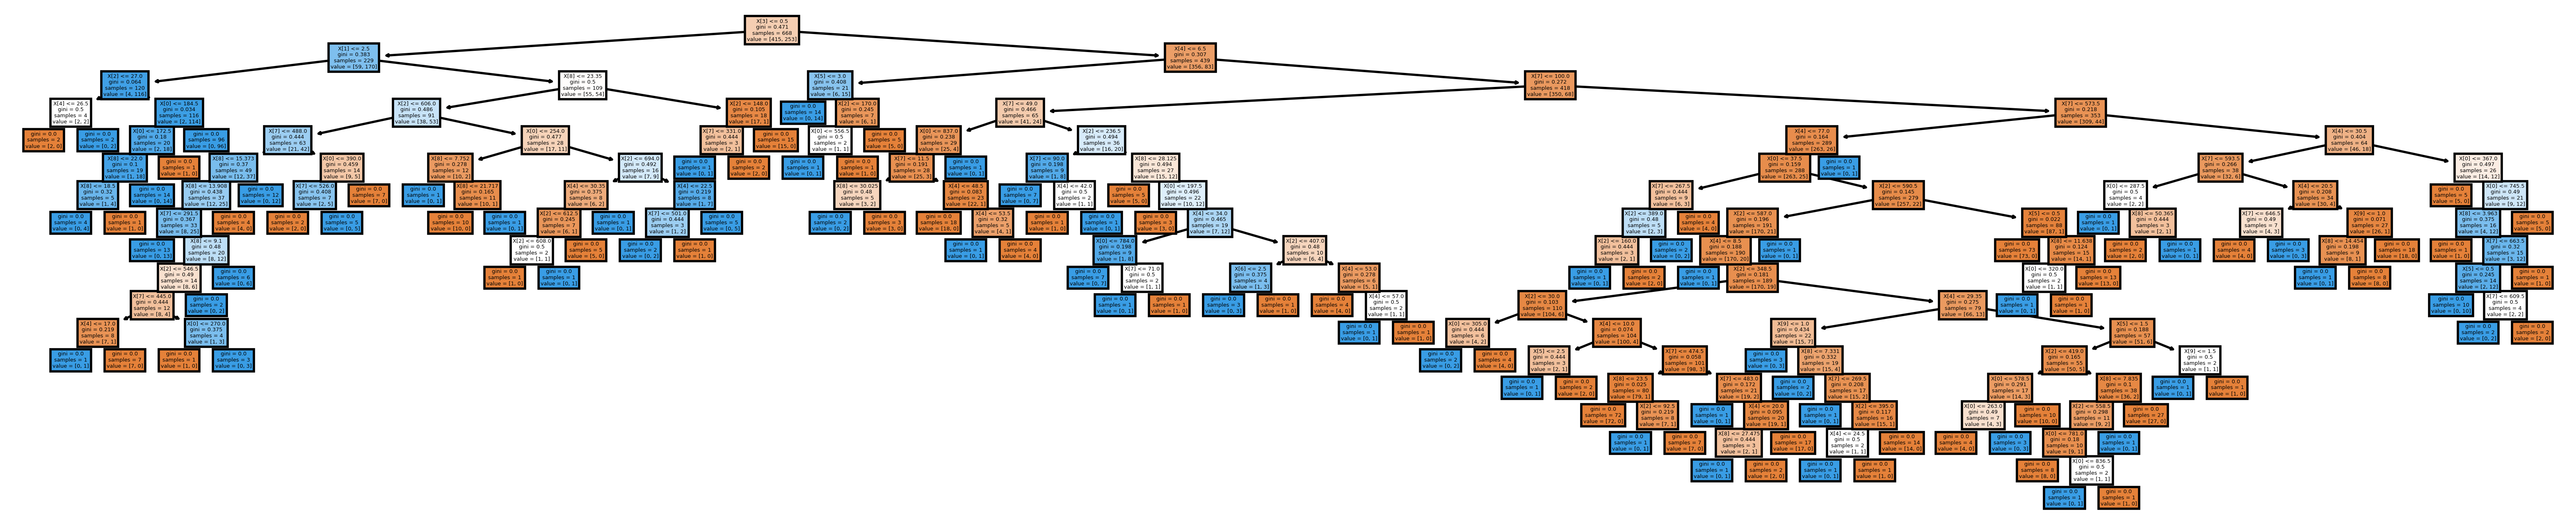

In [17]:
fig, axes = plt.subplots(figsize=(20, 4), dpi=400)
tree.plot_tree(decision_tree, filled=True)
fig.savefig('decision_tree_structure.png')